- Import for python

In [245]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder


1. Get data from API

In [246]:
df = pd.read_csv("https://raw.githubusercontent.com/atikagondal/Assignment-2-dave3625-202323/main/TSLA.csv")


df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


2. Lets see correlation in our dataset

In [247]:
corr = df.corr()

corr.style.background_gradient(cmap="coolwarm")

C:\Users\nguye\AppData\Local\Temp\ipykernel_19556\1125255195.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999763,0.999691,0.999445,0.999445,0.143866
High,0.999763,1.000000,0.999606,0.999771,0.999771,0.149006
Low,0.999691,0.999606,1.000000,0.999684,0.999684,0.138580
Close,0.999445,0.999771,0.999684,1.000000,1.000000,0.144794
Adj Close,0.999445,0.999771,0.999684,1.000000,1.000000,0.144794
Volume,0.143866,0.149006,0.138580,0.144794,0.144794,1.000000


- As we can see, the relatively low correlation of "Volume" with price-related columns suggest that "Volume" column is not strongly linearly related to price movements

In [248]:
# we drop the "Volume" column

df.drop(columns="Volume", inplace=True)

df.head()

,Date,Open,High,Low,Close,Adj Close
0,2010-06-29,3.800,5.000,3.508,4.778,4.778
1,2010-06-30,5.158,6.084,4.660,4.766,4.766
2,2010-07-01,5.000,5.184,4.054,4.392,4.392
3,2010-07-02,4.600,4.620,3.742,3.840,3.840
4,2010-07-06,4.000,4.000,3.166,3.222,3.222


3. Scaling

- Lets first create 

In [249]:
df["Date"] = pd.to_datetime(df['Date'])

# create time stamp to for linear regression later
df["ts"] = df.Date.values.astype(np.int64)

df.head()

,Date,Open,High,Low,Close,Adj Close,ts
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,1277769600000000000
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,1277856000000000000
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,1277942400000000000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,1278028800000000000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,1278374400000000000


<Axes: xlabel='Date', ylabel='Close'>

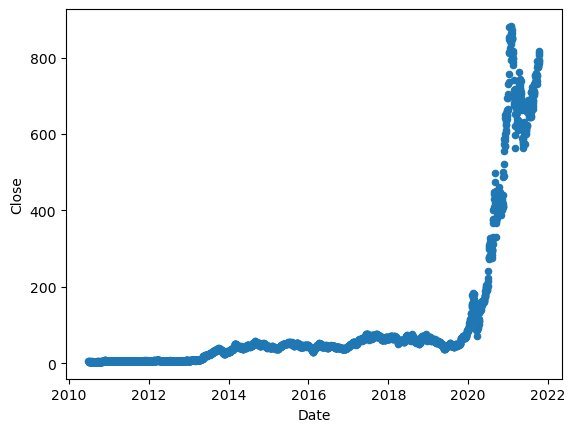

In [250]:
df.plot.scatter(x='Date', y = 'Close')

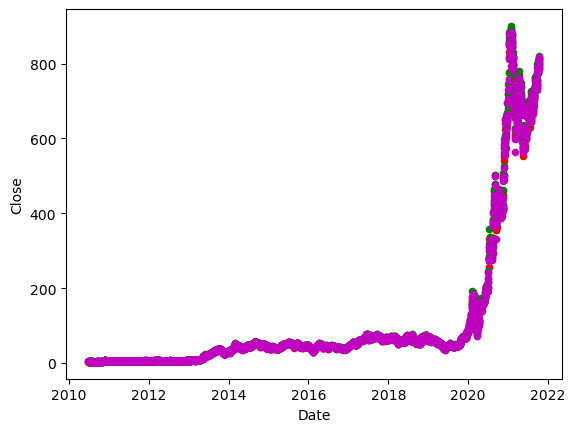

In [251]:
ax1 = df.plot(kind='scatter', x='Date', y='Open', color='r')
ax2 = df.plot(kind='scatter', x='Date', y='High', color='g', ax=ax1)
ax3 = df.plot(kind='scatter', x='Date', y='Close', color='m', ax=ax1)


4. Train our model

- Split the set into training and testing test

In [252]:
X = pd.DataFrame(df['Date'])
y = pd.DataFrame(df['Close'])

# # test_size = 0.33 meaning that 1/3 of values will be in a test array
# Random state is a variable that seed the random generator, so that we can get hte same training
# and testing set each run


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


- 2/3 values in Date stored in X_train, and the rest is in X_test. We will now create linear regressor mode:

In [253]:
# create object
linear_regressor = LinearRegression()

# perform linear regression
linear_regressor.fit(X_train, y_train)

Y_pred = linear_regressor.predict(X_train) # make prediction

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[float64]'>)

- Lets plot to see the result

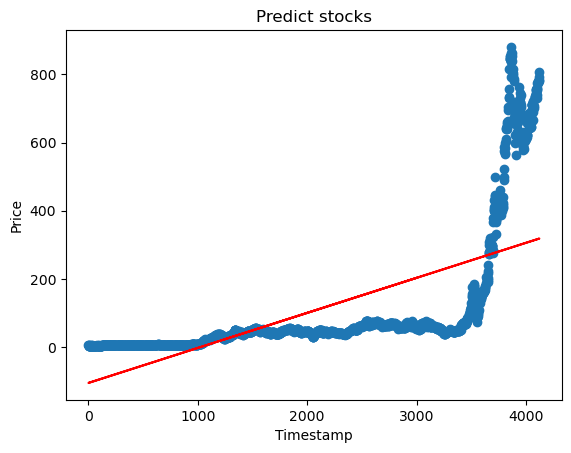

MSE = 21095.046555767265


In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, Y_pred, color='r')
plt.title('Predict stocks')
plt.xlabel('Timestamp')
plt.ylabel('Price')

plt.show()
print( "MSE = "+str(metrics.mean_squared_error(y_train,Y_pred))) #Calculate MSE